# Teste do Steepest descent utilizando a função Rosenbrock

Teste do algoritmo de otimização de *Steepest descent* (Máxima declividade) utilizando a função Rosenbrock. Esta é uma função não-convexa introduzida por Howard H. Rosenbrock em 1960. 

**[Referências]**

https://en.wikipedia.org/wiki/Rosenbrock_function

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Função Rosenbrock

A função Rosenbrock possui um mínimo global que é localizado em um longo e estreito vale de formato parabólico. Esta função é definida como:

$$ f(x,y) = (a-x)^2 + b(y - x^2)^2, $$

em que $(x,y) = (a,a^2)$ é o mínimo global desta função. 

In [2]:
def rosenbrock(x,y):
    '''
    Defining the rosenbrock function.   
    
    '''
    f = (1. - x)**2 + 100.*(y - x**2)**2
    return f

## Definindo as coordenadas para calcular a função

In [3]:
Nx = 30
Ny = 30
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)

In [4]:
X,Y = np.meshgrid(x,y)

In [5]:
Z = rosenbrock(X,Y) 

## Visualizando a função Rosenbrock

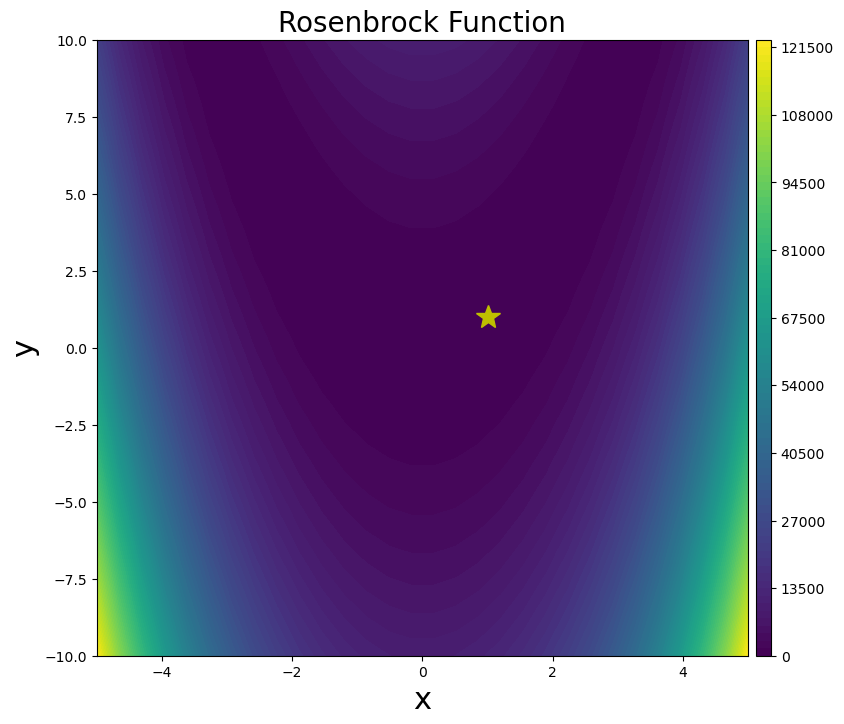

In [6]:
title_font = 22
bottom_font = 16
plt.figure(figsize=(10,8))

plt.contourf(X, Y, Z, 100, cmap='viridis')
plt.plot(1.,1., 'y*',markersize=18)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.title('Rosenbrock Function',fontsize=20)

plt.show()

## Calculando o gradiente da função Rosenbrock

In [7]:
def gradient(x,y):
    '''
    Calculate the gradient of rosenbrock function.
    '''
    J1 = -400.*x*(y - x**2) - 2.*(1. - x)
    J2 = 200.*(y - x**2)
    J = np.array([J1,J2])
    return J

## Resolvendo o sistema linear através do Steepest descent

In [20]:
itmax = 20000

px = []
py = []
p0 = np.array([-4.,-7.5]) # Chute inicial
px.append(p0[0])
py.append(p0[1])

phi = []
iteration = []
for i in range(itmax):
    eta = 1e-4  
    dp = gradient(p0[0],p0[1])
    phi_i = rosenbrock(p0[0],p0[1])
    
    p0 -= eta*dp
    phi_plus = rosenbrock(p0[0],p0[1])
    
    iteration.append(i)
    px.append(p0[0])
    py.append(p0[1])
    phi.append(phi_plus)    

### Estimativa para o mínimo da função

In [21]:
p0

array([0.82055518, 0.67251279])

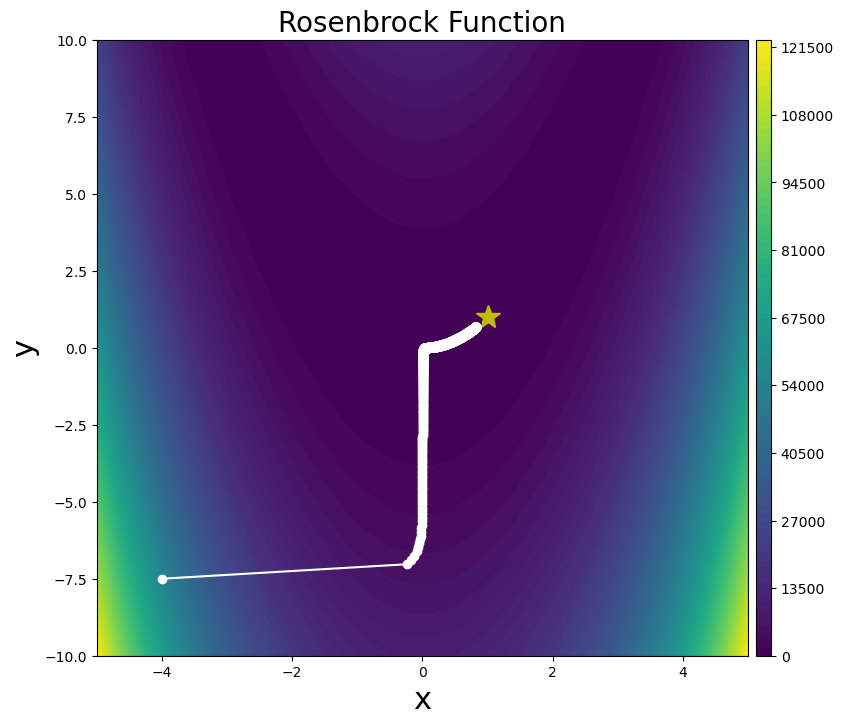

In [22]:
itle_font = 22
bottom_font = 16
plt.figure(figsize=(10,8))

plt.contourf(X, Y, Z, 100, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.plot(1.,1., 'y*',markersize=18)
plt.plot(px,py,'wo-')
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.title('Rosenbrock Function',fontsize=20)

plt.show()